In [1]:
##Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read CSV file
df = pd.read_csv('Resources/ECT_Data.csv', low_memory=False)
df[['SR Create TS', 'SR Close TS', 'Cust Contact TS']] = df[['SR Create TS', 'SR Close TS', 'Cust Contact TS']].astype('datetime64[ns]')

#Create new data with columns we're interested in
new_df = df[['OCPM #', 'Make/Miss', 'SR Create TS', 'SR Close TS']]

#Add column to hold difference between SR Close TS and SR Create TS
new_df['CX - RC'] = (new_df.loc[:, 'SR Close TS'] - new_df.loc[:, 'SR Create TS'])

#Convert new cols to decimals
for index, rows in new_df.iterrows():
    new_df.iloc[index, 4] = rows[4].days + rows[4].seconds/(24*60*60)

#Convert to float
new_df['CX - RC'] = new_df['CX - RC'].astype('float64')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [11]:
new_df.describe()

,CX - RC
count,23563.000000
mean,12.304386
std,10.775179
min,0.000694
25%,4.106944
50%,8.429167
75%,18.113889
max,166.970833


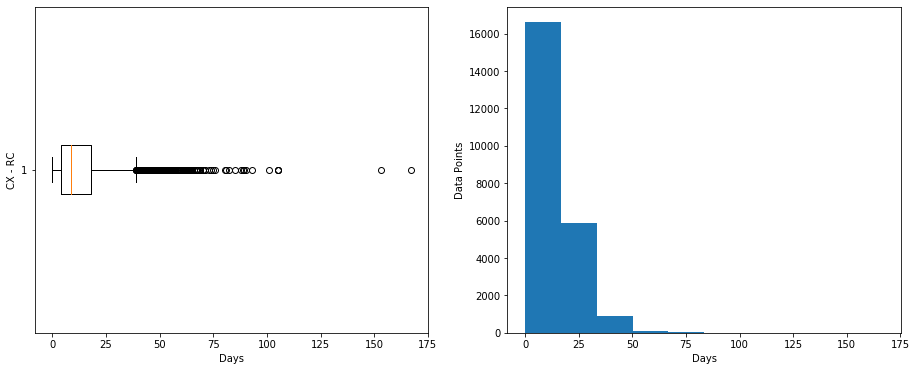

In [3]:
#Boxplot and histogram
data = new_df['CX - RC']

plt.figure(figsize=(24,6))
plt.subplot(131)
plt.boxplot(data, vert = False)
plt.xlabel('Days')
plt.ylabel('CX - RC')
plt.subplot(132)
plt.hist(data)
plt.xlabel('Days')
plt.ylabel('Data Points')
plt.show()

In [4]:
#Caculate quartiles and bounds
q1,q3 = new_df['CX - RC'].quantile([0.25, 0.75])
iqr = q3 - q1
lower = q1 - (iqr * 1.5)
upper = q3 + (iqr * 1.5)

In [5]:
#Remove outliers from data frame, add to new
outliers_removed = new_df[(new_df['CX - RC'] <= upper) & (new_df['CX - RC'] >= lower)]
outliers_removed.describe()

,CX - RC
count,23040.000000
mean,11.473800
std,9.176741
min,0.000694
25%,4.072917
50%,8.052431
75%,17.733681
max,39.102083


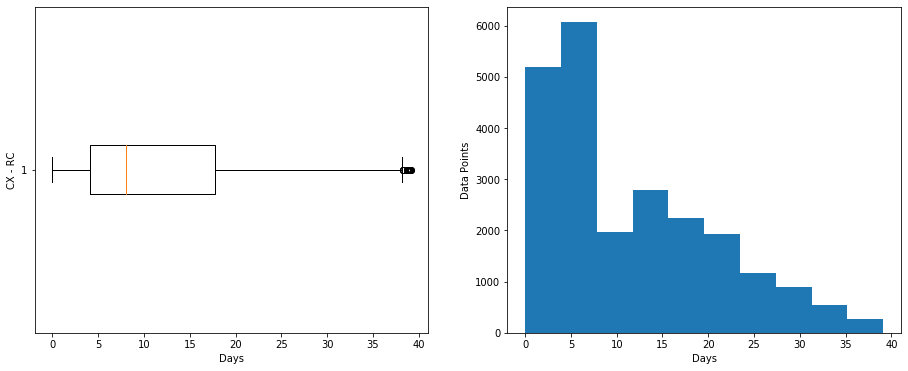

In [6]:
#Boxplot and histogram
data = outliers_removed['CX - RC']

plt.figure(figsize=(24,6))
plt.subplot(131)
plt.boxplot(data, vert = False)
plt.xlabel('Days')
plt.ylabel('CX - RC')
plt.subplot(132)
plt.hist(data)
plt.xlabel('Days')
plt.ylabel('Data Points')
plt.show()

In [7]:
#Df with outliers only
outliers_only = new_df[(new_df['CX - RC'] > upper) | (new_df['CX - RC'] < lower)]
outliers_only.describe()

,CX - RC
count,523.000000
mean,48.894675
std,12.330655
min,39.147222
25%,41.902431
50%,45.126389
75%,51.202083
max,166.970833


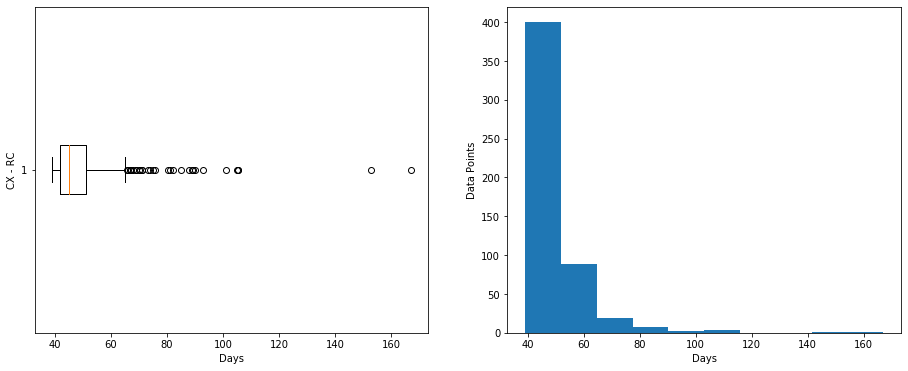

In [8]:
#Boxplot and histogram
data = outliers_only['CX - RC']

plt.figure(figsize=(24,6))
plt.subplot(131)
plt.boxplot(data, vert = False)
plt.xlabel('Days')
plt.ylabel('CX - RC')
plt.subplot(132)
plt.hist(data)
plt.xlabel('Days')
plt.ylabel('Data Points')
plt.show()

In [10]:
#Save to CSV file
outliers_only.to_csv('Resources/outliers.csv', index = False)